# Student Academic Outcome Prediction - High Performance Model

## Import necessary libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from scipy import stats

import shap
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


# Set random seed for reproducibility
np.random.seed(42)




In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets/data2.xlsx')

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   



### 🧾 **Column Descriptions (simplified):**

Let me summarize a few important ones so you get the idea:

| Column Name | Description |
|-------------|-------------|
| `Marital status` | Coded number for marital status (e.g., single, married) |
| `Application mode` | How the student applied (e.g., online, in-person) |
| `Course` | The course ID the student enrolled in |
| `Daytime/evening attendance` | Whether the student attends during day or evening |
| `Previous qualification (grade)` | Grade from the previous qualification (e.g., high school score) |
| `Admission grade` | Grade used to get admitted |
| `Debtor` | If the student has any financial debts |
| `Tuition fees up to date` | Whether tuition payments are current |
| `Gender` | Student's gender (probably 0 for male, 1 for female, or vice versa) |
| `Age at enrollment` | Age of student when they enrolled |
| `Curricular units ...` | Various stats on courses taken in first and second semesters (enrolled, passed, grades, etc.) |
| `Unemployment rate`, `Inflation rate`, `GDP` | Socio-economic context at the time of enrollment |
| `Target` | **The main label or outcome** (e.g., did the student drop out? Graduate? etc.) |

---



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
df['Target'].value_counts(normalize=True)

,proportion
Target,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


### 🧼 Step 1: Basic Cleaning & Checks

In [ ]:
# . Check for missing values
print("\nMissing values:\n", df.isnull().sum())




Missing values:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                            

In [ ]:
# . Check for duplicates
duplicates = df.duplicated()
print("\nNumber of duplicate rows:", duplicates.sum())



Number of duplicate rows: 0


### 📊 Step 2: Outlier Detection (using z-score method)

In [ ]:
from scipy.stats import zscore

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate z-scores
z_scores = df[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3)

# Count of outliers per column
print("\nOutliers per column:\n", outliers.sum())







Outliers per column:
 Marital status                                    126
Application mode                                    0
Application order                                 138
Course                                            227
Daytime/evening attendance\t                        0
Previous qualification                            308
Previous qualification (grade)                     21
Nacionality                                        74
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                               112
Father's occupation                               177
Admission grade                                    22
Displaced                                           0
Educational special needs                          51
Debtor                                              0
Tuition fees up to date                             0
Gender                                              0
Schol

In [ ]:
def detect_iqr_outliers(df, drop_outliers=False):
    """
    Detect outliers in a DataFrame using the IQR method and optionally drop rows with outliers.
    Only processes numeric columns and skips non-numeric ones.

    Parameters:
    -----------
    df : pandas DataFrame
        The input dataset
    drop_outliers : bool, default False
        If True, returns a DataFrame with outlier rows removed
        If False, returns a Series indicating which columns have outliers

    Returns:
    --------
    If drop_outliers=False:
        outliers : pandas Series of bool
            Boolean Series indicating which numeric columns have outliers
    If drop_outliers=True:
        df_clean : pandas DataFrame
            DataFrame with outlier rows removed
        removed_count : int
            Number of rows removed
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    if numeric_df.empty:
        print("Warning: No numeric columns found in the DataFrame")
        if drop_outliers:
            return df.copy(), 0
        else:
            return pd.Series([], dtype=bool)

    # Calculate Q1, Q3 and IQR for all numeric columns at once
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # If just detecting outliers in columns
    if not drop_outliers:
        # Check if min is less than Q1-1.5*IQR or max is greater than Q3+1.5*IQR
        outliers = (numeric_df.min() < lower_bound) | (numeric_df.max() > upper_bound)
        return outliers

    # For dropping rows with outliers
    else:
        # Create a mask to identify outlier values in each cell
        outlier_mask = pd.DataFrame(index=df.index, columns=numeric_df.columns)

        for col in numeric_df.columns:
            # Identify outliers in this column
            outlier_mask[col] = (numeric_df[col] < lower_bound[col]) | (numeric_df[col] > upper_bound[col])

        # Rows with any outlier
        rows_with_outliers = outlier_mask.any(axis=1)

        # Count removed rows
        removed_count = rows_with_outliers.sum()
        print(f"Removed {removed_count} rows containing outliers")

        # Create clean DataFrame without outlier rows
        df_clean = df[~rows_with_outliers].copy()

        # Print which columns had outliers
        columns_with_outliers = outlier_mask.any().index[outlier_mask.any()]
        print("Columns that had outliers:", columns_with_outliers.tolist())

        return df_clean, removed_count



# Keep your existing code
train_clean = df.copy()

outliers = detect_iqr_outliers(train_clean)
print("Columns with outliers:", outliers[outliers].index.tolist())

#To detect and drop rows with outliers (returns a clean DataFrame and count of rows removed)
train_clean_no_outliers, removed_count = detect_iqr_outliers(train_clean, drop_outliers=True)
print(f"Shape before: {train_clean.shape}, Shape after: {train_clean_no_outliers.shape}")

Columns with outliers: ['Marital status', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's occupation", "Father's occupation", 'Admission grade', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']
Removed 3519 rows containing outliers
Columns that had outliers: ['Marital status', 'Application order', 'Course', 'Daytime/evening attenda

### 📈 Step 3: Basic EDA (Visualization & Stats)

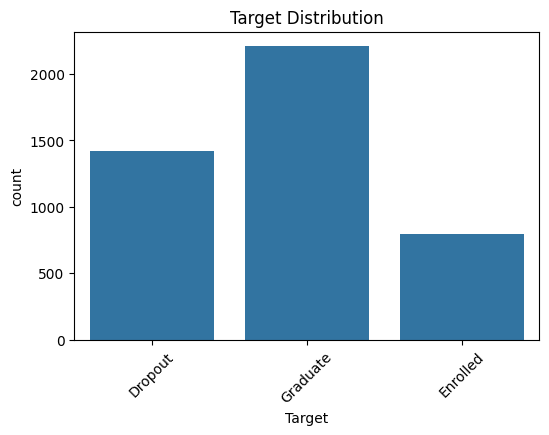

In [ ]:
# 1. Target value distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title("Target Distribution")
plt.xticks(rotation=45)
plt.show()




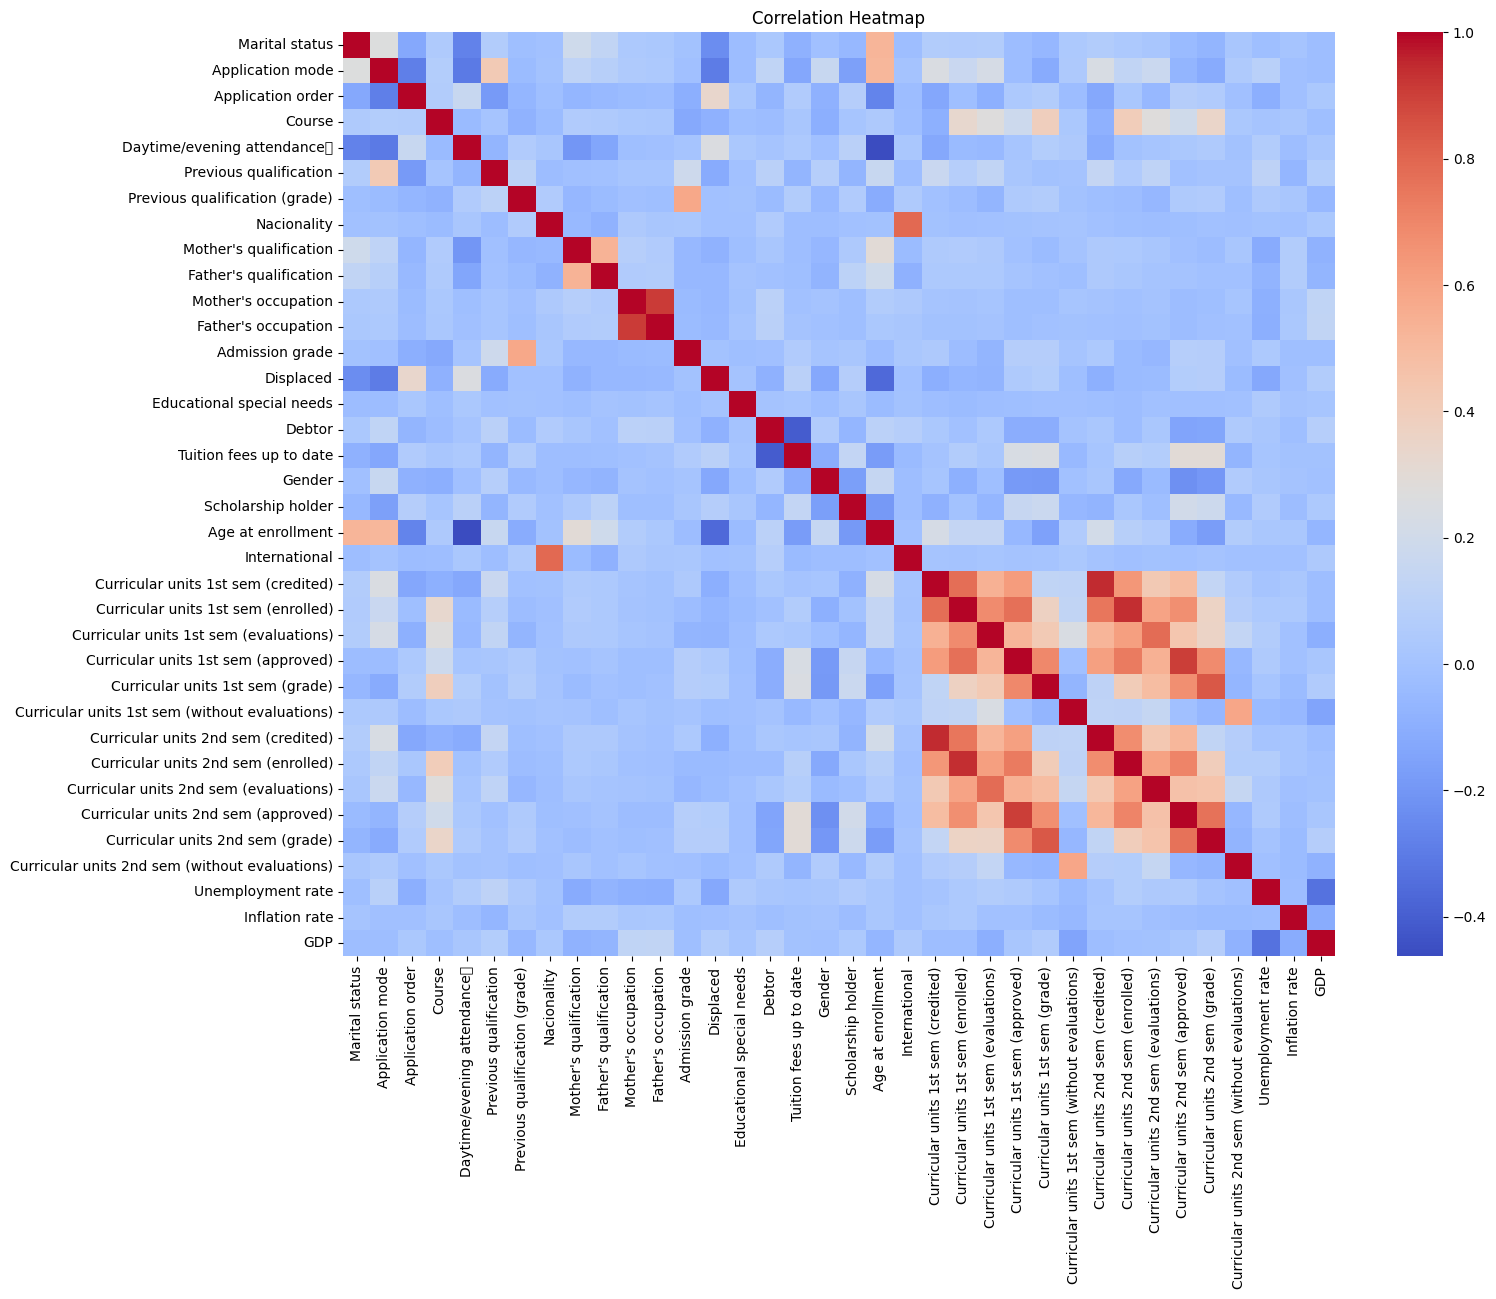

In [ ]:
# 2. Correlation heatmap
plt.figure(figsize=(16, 12))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()



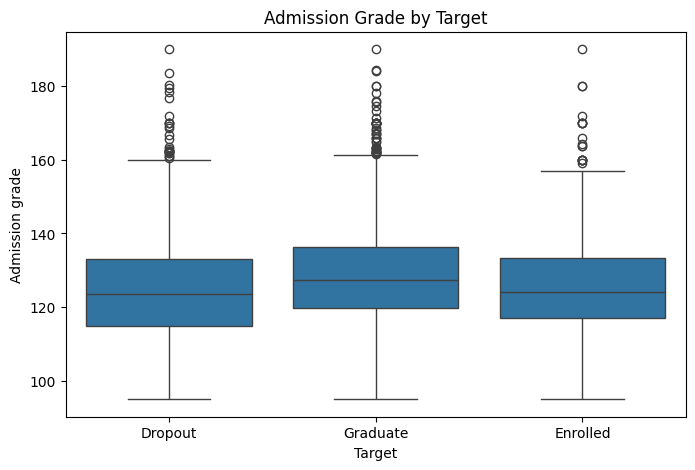

In [ ]:
# 3. Admission grade vs Target
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Target', y='Admission grade')
plt.title("Admission Grade by Target")
plt.show()


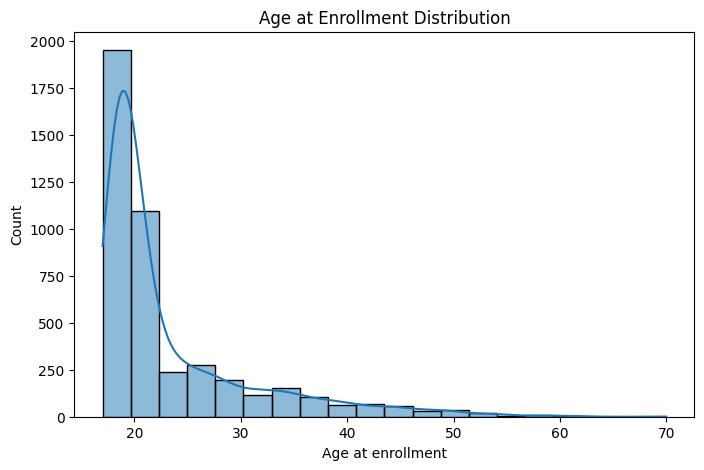

In [ ]:
# 4. Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age at enrollment'], bins=20, kde=True)
plt.title("Age at Enrollment Distribution")
plt.show()

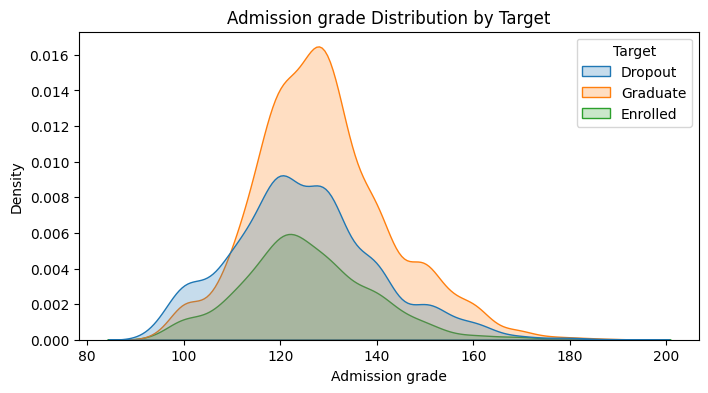

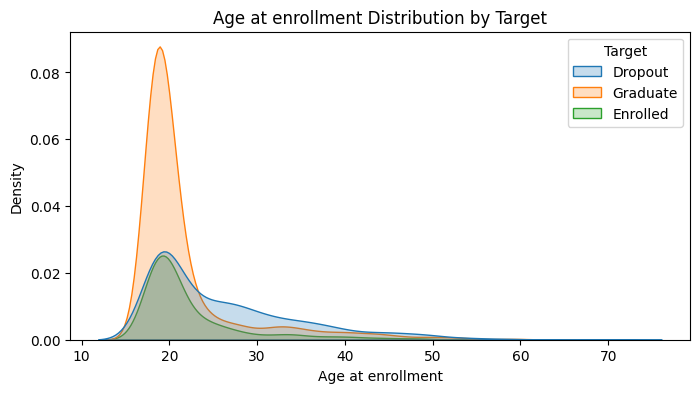

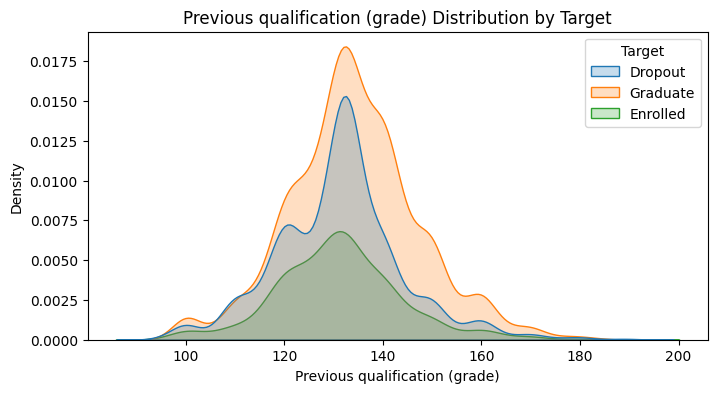

In [ ]:
top_features = ['Admission grade', 'Age at enrollment', 'Previous qualification (grade)',
                'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='Target', fill=True)
    plt.title(f"{feature} Distribution by Target")
    plt.show()


In [ ]:
cat_features = ['Marital status', 'Gender', 'Debtor', 'Tuition fees up to date',
                'Scholarship holder', 'International']

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Target')
    plt.title(f"{feature} by Target")
    plt.legend(title='Target')
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original Target column if needed
df['Target_encoded'] = LabelEncoder().fit_transform(df['Target'])

# Correlation with target (only numerical columns)
numerical_corr = df.select_dtypes(include=['int64', 'float64']).corr()
target_corr = numerical_corr['Target_encoded'].sort_values(ascending=False)

print("Features correlated with Target:\n", target_corr.head(37))



In [ ]:
features_to_drop = [
    'Curricular units 2nd sem (evaluations)',
    'Application order',
    'Daytime/evening attendance\t',
    'Curricular units 2nd sem (credited)',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (evaluations)',
    'GDP',
    'Course',
    'Unemployment rate',
    'International',
    "Father's qualification",
    "Father's occupation",
    "Mother's occupation",
    'Educational special needs',
    'Nacionality',
    'Curricular units 2nd sem (evaluations)',
    'Application order',
    'Daytime/evening attendance\t',
    'Curricular units 2nd sem (credited)',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (evaluations)',
    'GDP',
    'Course',
    'Unemployment rate',
    'International',
    "Father's qualification",
    "Father's occupation",
    "Mother's occupation",
    'Educational special needs',
    'Nacionality'
]



print("Total features to drop:", len(features_to_drop))



In [ ]:
df = df.drop(columns=features_to_drop , axis = 1)


In [ ]:
df.info()

In [ ]:

# Step 1: Separate features and target
X = df.drop(columns=['Target', 'Target_encoded'])  # Features
y = df['Target_encoded']  # Target variable (encoded)



In [ ]:
# Check class distribution
print("Class distribution before balancing:")
print(y.value_counts())
print(y.value_counts(normalize=True).round(3) * 100, "%")



In [ ]:
# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)



In [ ]:
# Step 3: Balance the training data using SMOTE
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the balanced class distribution
print("\nClass distribution after balancing with SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
print(pd.Series(y_train_balanced).value_counts(normalize=True).round(3) * 100, "%")

## Feature Selection

Performing recursive feature elimination with cross-validation...

Optimal number of features: 15

Selected 15 features:
1. Application mode
2. Previous qualification (grade)
3. Mother's qualification
4. Admission grade
5. Tuition fees up to date
6. Gender
7. Scholarship holder
8. Age at enrollment
9. Curricular units 1st sem (enrolled)
10. Curricular units 1st sem (approved)
11. Curricular units 1st sem (grade)
12. Curricular units 2nd sem (enrolled)
13. Curricular units 2nd sem (approved)
14. Curricular units 2nd sem (grade)
15. Inflation rate


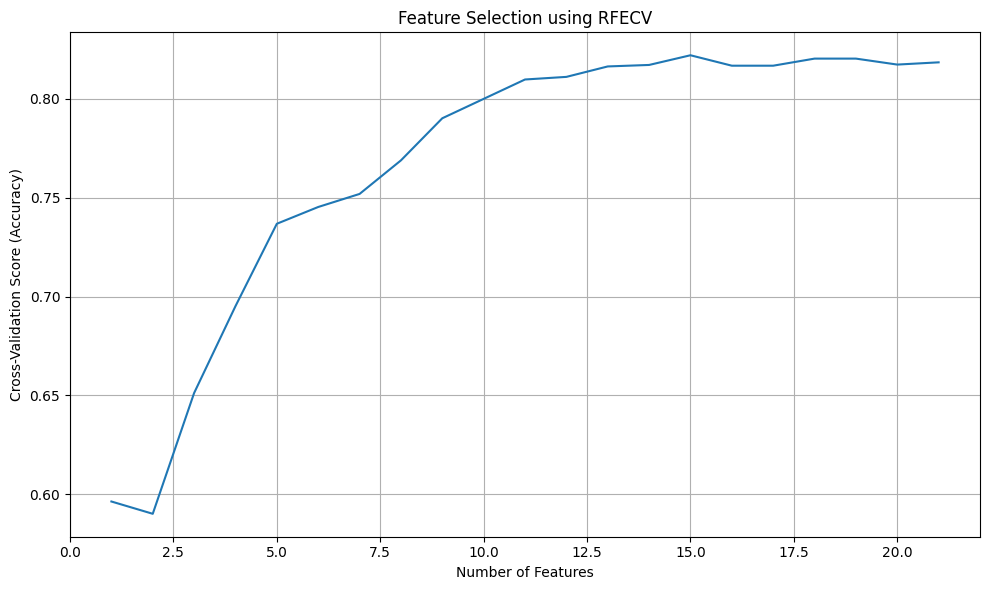


Feature selection complete. You can use 'selected_features' in your code.


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Feature selection using RFECV
# Initialize the base estimator for RFECV (RandomForest works well with RFECV)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFECV with cross-validation
# cv=5 means 5-fold cross-validation
# scoring='accuracy' means we'll select features that maximize accuracy
# step=1 means remove one feature at a time
rfecv = RFECV(
    estimator=base_estimator,
    step=1,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring='accuracy',
    min_features_to_select=1,
    n_jobs=-1  # Use all available processors
)

# Fit RFECV on the training data
print("Performing recursive feature elimination with cross-validation...")
rfecv.fit(X_train_balanced, y_train_balanced)

# Get the selected features
feature_indices = rfecv.get_support(indices=True)
selected_features = X.columns[feature_indices]

# Apply feature selection to the datasets
X_train_selected = rfecv.transform(X_train_balanced)
X_test_selected = rfecv.transform(X_test)

# Print results
print(f"\nOptimal number of features: {rfecv.n_features_}")
print(f"\nSelected {len(selected_features)} features:")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

# Plot number of features vs. cross-validation scores
# Using the correct attribute based on scikit-learn version
plt.figure(figsize=(10, 6))
try:
    # For newer scikit-learn versions
    if hasattr(rfecv, 'cv_results_'):
        plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    # For older scikit-learn versions
    elif hasattr(rfecv, 'grid_scores_'):
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    else:
        # Another approach that should work in most versions
        n_scores = len(rfecv._cv_results['mean_test_score']) if hasattr(rfecv, '_cv_results') else rfecv.n_features_
        plt.plot(range(1, n_scores + 1), rfecv.cv_results_['mean_test_score'] if hasattr(rfecv, 'cv_results_') else np.array([]))
        print("Warning: Could not retrieve CV scores for plotting. Your scikit-learn version may use a different attribute.")
except Exception as e:
    print(f"Error creating plot: {e}")
    print("Skipping plot generation.")

plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score (Accuracy)')
plt.title('Feature Selection using RFECV')
plt.tight_layout()
plt.grid(True)
plt.show()

# At this point, selected_features contains the optimal features selected by RFECV
# and X_train_selected, X_test_selected contain the transformed datasets
print("\nFeature selection complete. You can use 'selected_features' in your code.")

# Feature Selection Results using RFECV

## Optimal Feature Count
**Number of optimal features identified:** 15

## Performance Analysis

| Metric | Value |
|--------|-------|
| Optimal accuracy | ~82-83% |
| Accuracy threshold | 10 features → ~80% |

## Accuracy Progression
- **Initial phase (1-10 features)**: Sharp increase in accuracy
- **Refinement phase (10-15 features)**: Slight improvement to peak accuracy
- **Plateau phase (15+ features)**: Minimal to no improvement

## Conclusion
The RFECV algorithm successfully identified the 15 most important features that achieve maximum predictive performance. Using fewer features results in decreased accuracy, while using more features does not significantly improve model performance.

In [ ]:
# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [ ]:
# Step 6: Define models for evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'SVM': SVC(probability=True, random_state=0),
    'KNN': KNeighborsClassifier()
}

# Step 7: Define evaluation metrics function
def evaluate_model(y_true, y_pred, y_prob=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

    # If probabilities are provided, calculate ROC AUC for multi-class
    if y_prob is not None:
        # For multi-class, we use one-vs-rest approach
        if len(set(y_true)) > 2:
            metrics['ROC AUC'] = roc_auc_score(pd.get_dummies(y_true), y_prob, multi_class='ovr')
        else:
            metrics['ROC AUC'] = roc_auc_score(y_true, y_prob[:, 1])

    return metrics



In [ ]:
# Step 8: Train and evaluate models without CV
print("\nModel evaluation before cross-validation:")
results_before_cv = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Get probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)
    else:
        y_prob = None

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred, y_prob)
    results_before_cv[name] = metrics

    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))




Model evaluation before cross-validation:

Logistic Regression:
Accuracy: 0.7232
Precision: 0.7647
Recall: 0.7232
F1 Score: 0.7372
ROC AUC: 0.8699

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       284
           1       0.39      0.59      0.47       159
           2       0.84      0.79      0.81       442

    accuracy                           0.72       885
   macro avg       0.70      0.69      0.68       885
weighted avg       0.76      0.72      0.74       885


Random Forest:
Accuracy: 0.7605
Precision: 0.7694
Recall: 0.7605
F1 Score: 0.7632
ROC AUC: 0.8718

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       284
           1       0.47      0.52      0.49       159
           2       0.82      0.85      0.83       442

    accuracy                           0.76       885
   macro avg       0.72      0.71      0.71       88

In [ ]:
# Convert results to DataFrame for easy comparison
results_df_before_cv = pd.DataFrame(results_before_cv).T
print("\nModel performance comparison before CV:")
print(results_df_before_cv)

# Step 9: Perform cross-validation
print("\nModel evaluation with cross-validation:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
results_cv = {}

for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_balanced, cv=cv, scoring='accuracy')

    # Store results
    results_cv[name] = {
        'Mean Accuracy': cv_scores.mean(),
        'Std Accuracy': cv_scores.std()
    }

    print(f"\n{name}:")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Std Accuracy: {cv_scores.std():.4f}")



Model performance comparison before CV:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.723164   0.764715  0.723164  0.737235  0.869888
Random Forest        0.760452   0.769410  0.760452  0.763235  0.871780
Gradient Boosting    0.749153   0.760390  0.749153  0.753055  0.877438
SVM                  0.746893   0.772721  0.746893  0.755170  0.863386
KNN                  0.651977   0.704550  0.651977  0.671523  0.794137

Model evaluation with cross-validation:

Logistic Regression:
Mean Accuracy: 0.7382
Std Accuracy: 0.0079

Random Forest:
Mean Accuracy: 0.8172
Std Accuracy: 0.0099

Gradient Boosting:
Mean Accuracy: 0.7816
Std Accuracy: 0.0078

SVM:
Mean Accuracy: 0.7606
Std Accuracy: 0.0084

KNN:
Mean Accuracy: 0.7425
Std Accuracy: 0.0122


In [ ]:
# Convert CV results to DataFrame
results_df_cv = pd.DataFrame(results_cv).T
print("\nModel performance comparison with CV:")
print(results_df_cv)


Model performance comparison with CV:
                     Mean Accuracy  Std Accuracy
Logistic Regression       0.738160      0.007865
Random Forest             0.817205      0.009942
Gradient Boosting         0.781552      0.007831
SVM                       0.760610      0.008450
KNN                       0.742504      0.012213
